In [61]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Bandit params
no_bandits = 2000
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]

# Training params
iter_per_run = 10000
epsilon = 0.01

In [63]:
for bandit in range(no_bandits):
    bandits.append(ka.Karmed(arms, means, sigmas))
    bandits[bandit].set_train_params(iter_per_run, epsilon)

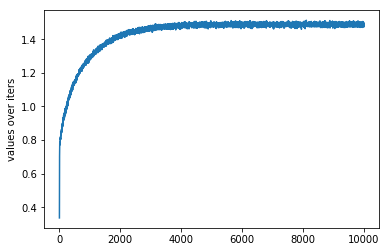

In [64]:
all_agents_iter_values = []
for b in range(no_bandits):
    iter_values, calculated_rewards = bandits[b].train()
    all_agents_iter_values.append(iter_values)


all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()